In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# To make the visualizations
!git clone https://github.com/CAHLR/d3-scatterplot.git
from google.colab.output import eval_js
from IPython.display import Javascript
from gensim.models import KeyedVectors

fatal: destination path 'd3-scatterplot' already exists and is not an empty directory.


#Dimesnionality Reduction using UMAP Algoirthm

Credits: https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b

Used the structure of code listed here, but changed hyperpraameters to fit data better

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
netflix_Rev_movies= pd.read_csv("/content/drive/MyDrive/netflix_movies")
# theatrical_movies = pd.read_csv("/content/drive/MyDrive/movies (1).csv")


In [6]:
#to make visualizing easier let's categorize Revenue
netflix_Rev_movies = netflix_Rev_movies.drop(columns = "Unnamed: 0")
netflix_Rev_movies.columns


Index(['title', 'genre', 'premiere', 'runtime', 'imdb score', 'language',
       'type', 'director', 'cast', 'country', 'release_year', 'rating',
       'description', 'features', 'isNetflix', 'Similar Movie', 'movie_id',
       'Revenue', 'action', 'adventure', 'aftershow', 'animated', 'animation',
       'anime', 'biographical', 'biopic', 'black', 'camera', 'christian',
       'christmas', 'comedy', 'concert', 'crime', 'dance', 'dark',
       'documentary', 'drama', 'epic', 'family', 'fantasy', 'fiction', 'film',
       'heist', 'hidden', 'historical', 'holiday', 'horror', 'interview',
       'man', 'mentalism', 'mockumentary', 'motion', 'musical', 'mystery',
       'one', 'political', 'prank', 'psychological', 'romance', 'romantic',
       'satire', 'science', 'short', 'show', 'special', 'sports', 'spy',
       'stop', 'superhero', 'teen', 'thriller', 'urban', 'variety', 'war',
       'western', 'zombie', 'Cluster'],
      dtype='object')

In [7]:
#cluster analysis df --? Revenue, Genre, and imdb score
cluster_df = netflix_Rev_movies[["Revenue", "genre", "imdb score", "runtime"]]
cluster_df

,Revenue,genre,imdb score,runtime
0,14521.0,"['horror', 'thriller']",3.2,94
1,31220247.0,"['heist', 'film', 'thriller']",3.7,149
2,209752.0,"['musical', 'western', 'fantasy']",3.9,73
3,1136167.0,['thriller'],4.2,90
4,1431904.0,"['political', 'thriller']",4.3,115
...,...,...,...,...
341,195673000.0,"['animation', 'christmas', 'comedy', 'adventure']",8.2,97
342,770945583.0,['documentary'],8.2,89
343,120000.0,['documentary'],8.3,51
344,18144644.0,"['one', 'man', 'show']",8.5,153


In [8]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.1 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=0b36f8b7479ef6c06b2123d878358cf7b48ff3876b56ab516792681309977f14
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [9]:
#Cluster analysis
import umap
# use Umap to do embedding then cluster on that
def umap_embed(df, n_components=2, intersection=False):

  numerical = df.select_dtypes(exclude='object')

  for c in numerical.columns:
      numerical[c] = (numerical[c] - numerical[c].mean())/numerical[c].std(ddof=0)

  ##preprocessing categorical
  categorical = df.select_dtypes(include='object')
  categorical = pd.get_dummies(categorical)

  #Embedding numerical & categorical
  fit1 = umap.UMAP(random_state=12,
                   n_neighbors = 40,
                   n_components=n_components,
                   min_dist = 0.0).fit(numerical)

  fit2 = umap.UMAP(metric='dice',
                   n_neighbors=40,
                   n_components=n_components,
                   min_dist = 0.0).fit(categorical)


  # intersection will resemble the numerical embedding more.
  if intersection:
    embedding = fit1 * fit2

  # union will resemble the categorical embedding more.
  else:
    embedding = fit1 + fit2

  umap_embedding = embedding.embedding_


  return umap_embedding


embedding_ =  umap_embed(cluster_df, n_components=2, intersection=False)
embedding_

array([[  9.3100395, -13.021948 ],
       [ 10.404203 , -15.461949 ],
       [  9.374056 , -13.889459 ],
       [  9.325759 , -14.190643 ],
       [ 10.38161  , -15.549718 ],
       [  9.304466 , -13.028762 ],
       [  9.281322 , -14.187052 ],
       [ 10.1349325, -16.401213 ],
       [ 11.173245 , -10.730234 ],
       [  9.277924 , -14.179932 ],
       [ 10.172476 , -16.418787 ],
       [ 10.774833 , -14.617882 ],
       [ 10.86437  , -14.614252 ],
       [ 10.0474615, -14.760286 ],
       [ 66.5575   , -33.402363 ],
       [ 10.711046 , -11.278499 ],
       [ 10.9627695, -11.215062 ],
       [ 10.139121 , -16.398325 ],
       [ 10.038915 , -16.345274 ],
       [ 10.437834 , -15.459948 ],
       [ 10.908602 , -11.256928 ],
       [  9.865859 , -14.816461 ],
       [  9.893485 , -12.9615755],
       [  9.360455 , -14.274926 ],
       [  9.3096695, -14.131698 ],
       [ 11.073849 , -13.585078 ],
       [  9.72456  , -15.012866 ],
       [ 66.75637  , -33.96919  ],
       [  7.0602155,

#Clustering using KMeans

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

clustering = netflix_Rev_movies.drop(columns=['title','premiere', 'language',
       'type', 'director', 'cast', 'country', 'release_year', "rating",
       'description', 'features', 'isNetflix', 'Similar Movie', 'movie_id',
        'Cluster','genre'])
clustering["x"] = embedding_[:,0]
clustering["y"] = embedding_[:,1]

def best_k(df):
  # For KMeans use argument n_init = 10 when applicable.
  scores = {}
  for k in np.arange(2,20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    scores[silhouette_score(df,kmeans.labels_)] = k
  return scores.get(max(scores.keys()))
clustering

,runtime,imdb score,Revenue,action,adventure,aftershow,animated,animation,anime,biographical,...,superhero,teen,thriller,urban,variety,war,western,zombie,x,y
0,94,3.2,14521.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,9.310040,-13.021948
1,149,3.7,31220247.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,10.404203,-15.461949
2,73,3.9,209752.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,9.374056,-13.889459
3,90,4.2,1136167.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,9.325759,-14.190643
4,115,4.3,1431904.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,10.381610,-15.549718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,97,8.2,195673000.0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,74.804497,-27.359531
342,89,8.2,770945583.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,75.064072,-27.339108
343,51,8.3,120000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,74.427055,-28.169655
344,153,8.5,18144644.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,65.741631,-34.674023


In [13]:
# k = best_k(clustering)
kmeans = KMeans(n_clusters= 7, random_state=42, n_init=10)
kmeans.fit(clustering)
labels = kmeans.labels_
final_df = pd.DataFrame({"x": clustering["x"], "y": clustering['y'], "Revenue": cluster_df["Revenue"], "Cluster": labels})

In [14]:
final_df

,x,y,Revenue,Cluster
0,9.310040,-13.021948,14521.0,0
1,10.404203,-15.461949,31220247.0,0
2,9.374056,-13.889459,209752.0,0
3,9.325759,-14.190643,1136167.0,0
4,10.381610,-15.549718,1431904.0,0
...,...,...,...,...
341,74.804497,-27.359531,195673000.0,4
342,75.064072,-27.339108,770945583.0,2
343,74.427055,-28.169655,120000.0,0
344,65.741631,-34.674023,18144644.0,0


In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
final_df.to_csv('d3-scatterplot/kmeans_version5.tsv', sep='\t', index=False)
final_df.shape

(346, 4)

In [16]:
def show_port(port, data_file, width=600, height=800):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%d) + '/index.html?dataset=%s'
    fm.width = '90%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, data_file, height)))

port = 8000
data_file = 'kmeans_version5.tsv'
height = 1500

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port)
show_port(port, data_file, height)

<IPython.core.display.Javascript object>

#Clustering using HBD Scanner

Hiearchal Clustering

In [17]:
pip install umap-learn

In [18]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 11.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039182 sha256=f12036eb061c85995b71258731e5ec14beb77b5f2f628be881311df93d4f90b4
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.6
    Uninstalling Cython-3.0.6:
      Successfully uninstalled Cython-3.0.6


In [19]:
#Clustering using hbdscan --> can classify some points as noise
# import umap.plot
import hdbscan
from matplotlib import pyplot as plt

hbd_labels = hdbscan.HDBSCAN(
    min_samples= 5,
    min_cluster_size = 6,
).fit_predict(embedding_)



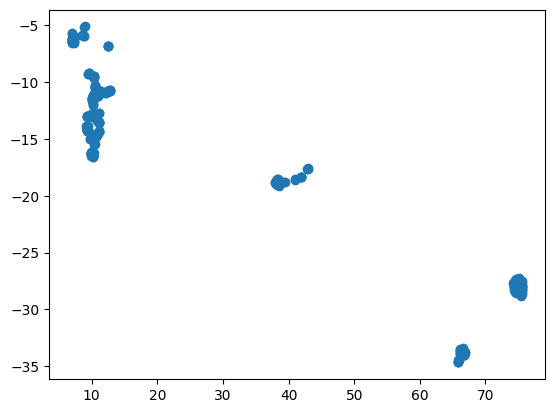

In [20]:
#Plotting the UMAP
plt.scatter(embedding_[:, 0], embedding_[:, 1], cmap='Spectral')

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt

final_df_umap = pd.DataFrame({"x": embedding_[:,0], "y": embedding_[:,1], "Cluster": hbd_labels, "Revenue": cluster_df["Revenue"], "Genre":cluster_df["genre"], "imdb scores": cluster_df["imdb score"],  "runtime": cluster_df["runtime"]})
final_df_umap.to_csv('d3-scatterplot/umap_version5.tsv', sep='\t', index=False)
# final_df.shape
final_df_umap

,x,y,Cluster,Revenue,Genre,imdb scores,runtime
0,9.310040,-13.021948,-1,14521.0,"['horror', 'thriller']",3.2,94
1,10.404203,-15.461949,-1,31220247.0,"['heist', 'film', 'thriller']",3.7,149
2,9.374056,-13.889459,8,209752.0,"['musical', 'western', 'fantasy']",3.9,73
3,9.325759,-14.190643,8,1136167.0,['thriller'],4.2,90
4,10.381610,-15.549718,6,1431904.0,"['political', 'thriller']",4.3,115
...,...,...,...,...,...,...,...
341,74.804497,-27.359531,0,195673000.0,"['animation', 'christmas', 'comedy', 'adventure']",8.2,97
342,75.064072,-27.339108,0,770945583.0,['documentary'],8.2,89
343,74.427055,-28.169655,0,120000.0,['documentary'],8.3,51
344,65.741631,-34.674023,1,18144644.0,"['one', 'man', 'show']",8.5,153


In [23]:
def show_port(port, data_file, width=600, height=800):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%d) + '/index.html?dataset=%s'
    fm.width = '90%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, data_file, height)))

port = 8000
data_file = 'umap_version5.tsv'
height = 1400

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port)
show_port(port, data_file, height)

<IPython.core.display.Javascript object>

In [25]:
#Finding the "centers of the cluster"
final_grouped = final_df_umap.drop(columns=["Genre"]).groupby("Cluster").agg({"Revenue": np.mean,	"imdb scores":np.mean, "runtime":np.mean})

adding_genres = final_df_umap[["Cluster"]].merge(clustering.drop(columns=["x","y","Revenue", "imdb score", "runtime"]), left_index=True, right_index=True)
grouped_genres = adding_genres.groupby('Cluster').sum().iloc[:,]
common_genre = pd.DataFrame(grouped_genres.idxmax(axis=1))

final_grouped = final_grouped.merge(common_genre, right_index=True, left_index=True)
final_grouped = final_grouped.rename({0:"Genre"}, axis=1)
final_grouped.sort_values("Revenue", ascending = False)

,Revenue,imdb scores,runtime,Genre
Cluster,,,,
7,2.300101e+08,5.805882,99.411765,comedy
13,1.801458e+08,6.325000,104.625000,biopic
11,1.019120e+08,6.166667,96.222222,adventure
12,9.477333e+07,6.250000,117.600000,action
5,5.403914e+07,5.842857,98.785714,comedy
-1,4.296960e+07,5.873333,104.633333,drama
0,3.818627e+07,7.012500,81.596154,documentary
2,3.393342e+07,6.565789,110.842105,drama
10,3.362412e+07,5.814286,102.285714,action
